In [3]:
import pandas as pd
df=pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


<Figure size 1200x800 with 0 Axes>

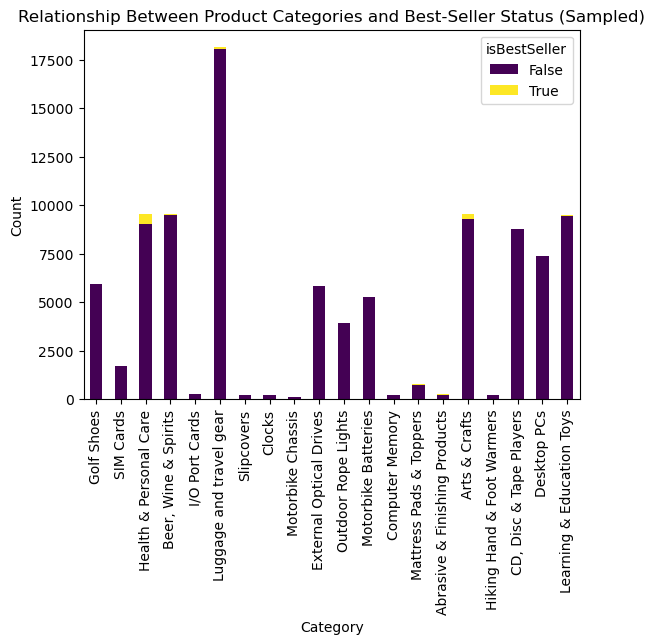

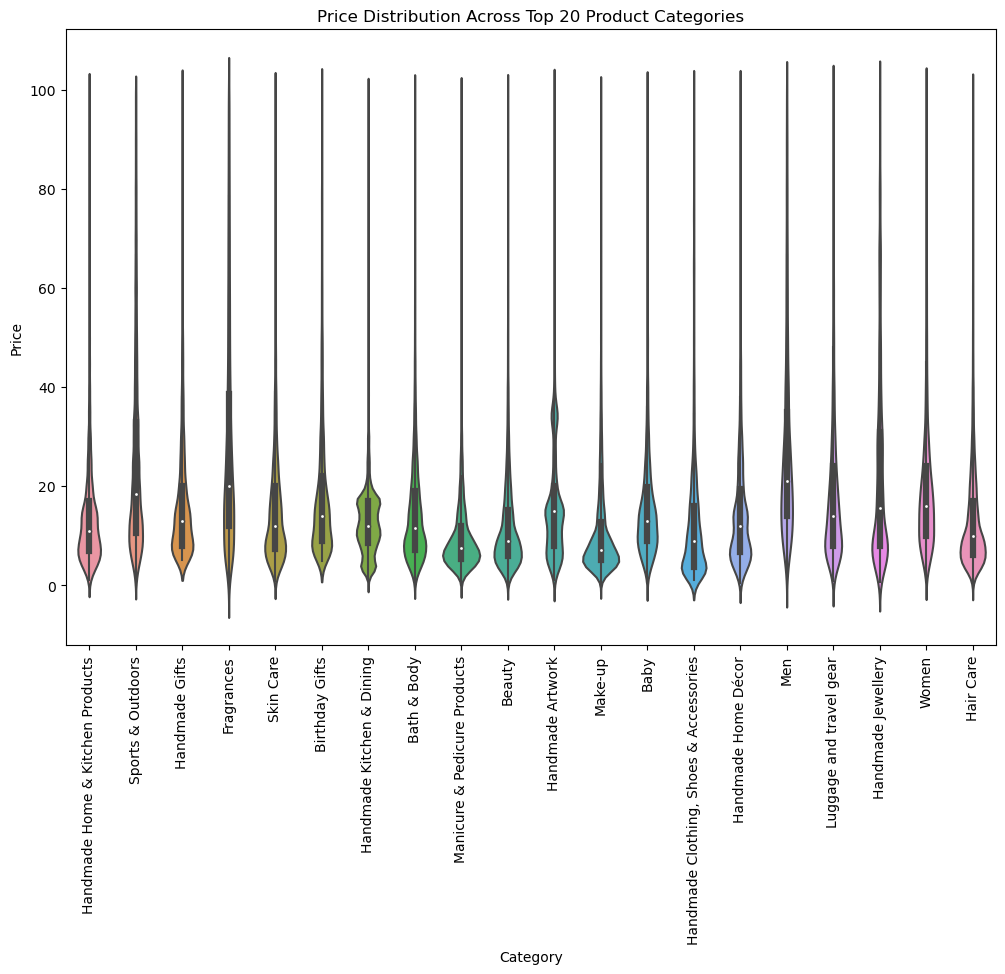

Category with the highest median price: Desktop PCs with median price of 74.0


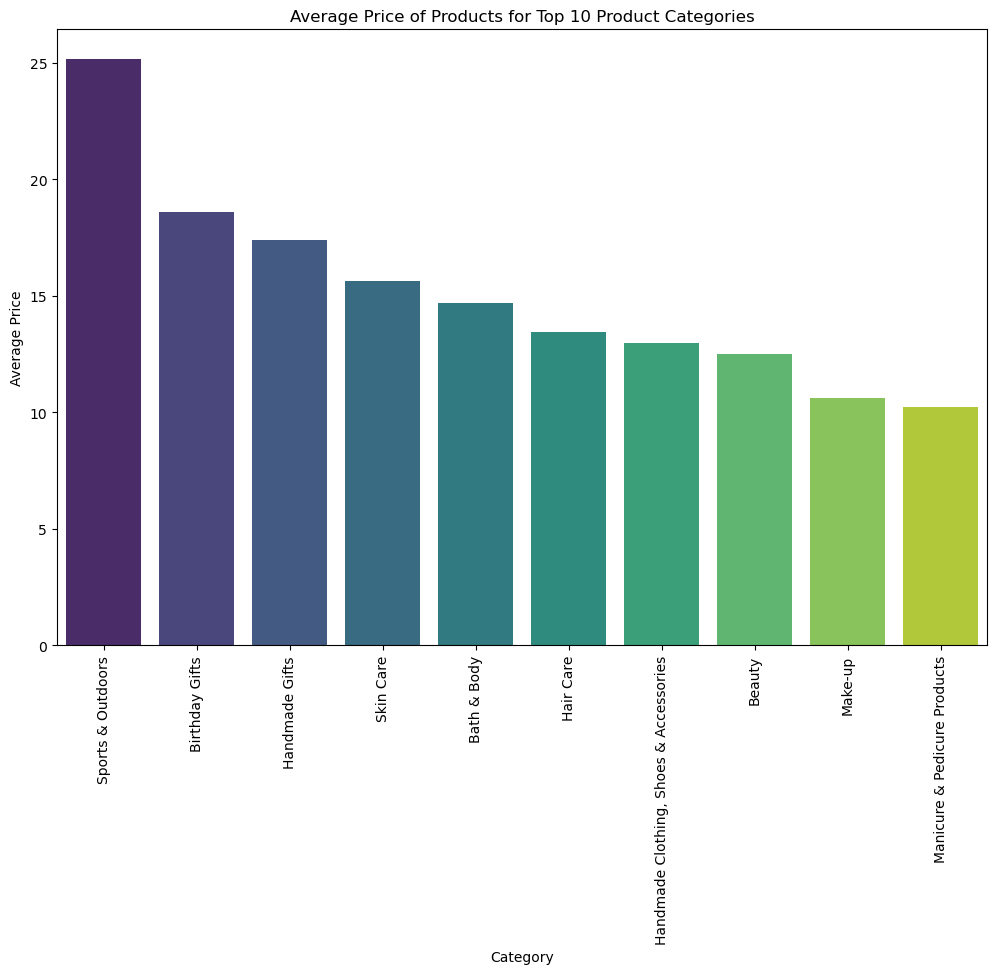

Category with the highest average price: Motherboards with average price of 68.77243243243242


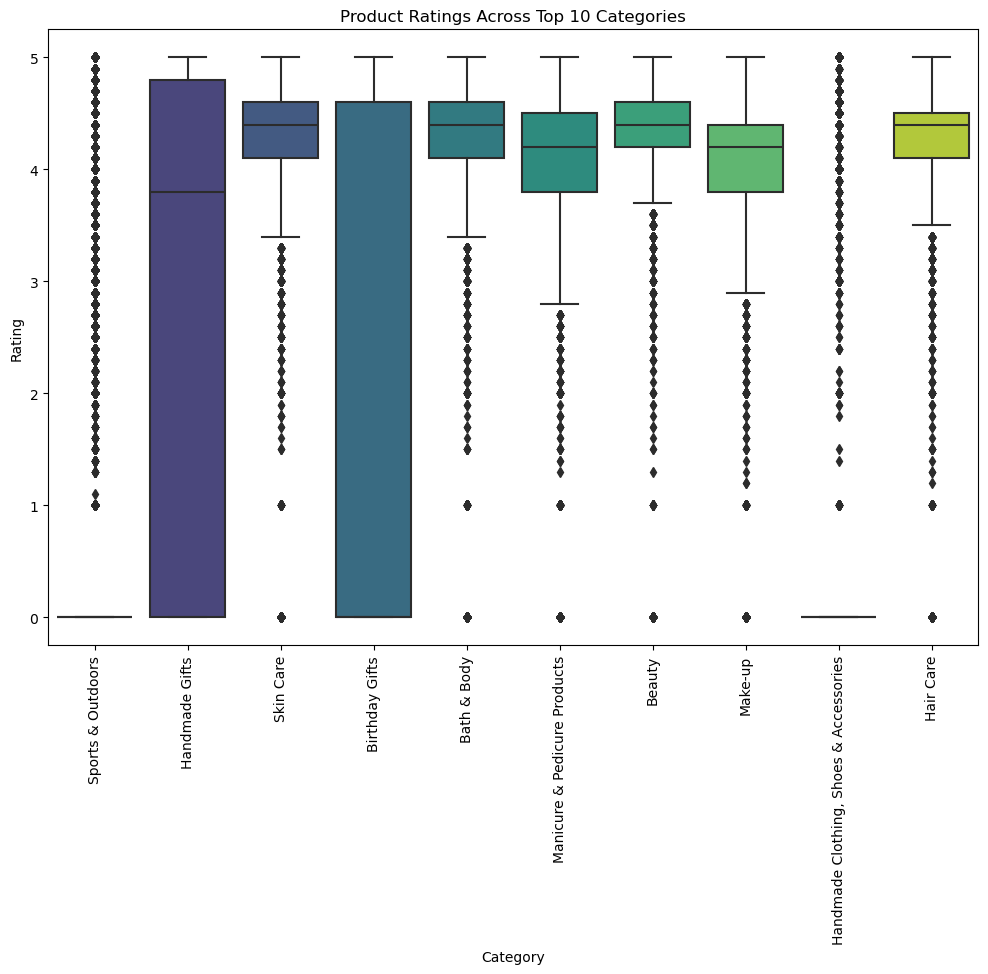

Category with the highest median rating: Computer Memory with median rating of 4.7
Correlation Coefficient between price and rating: -0.12490673262156951
P-value: 0.0


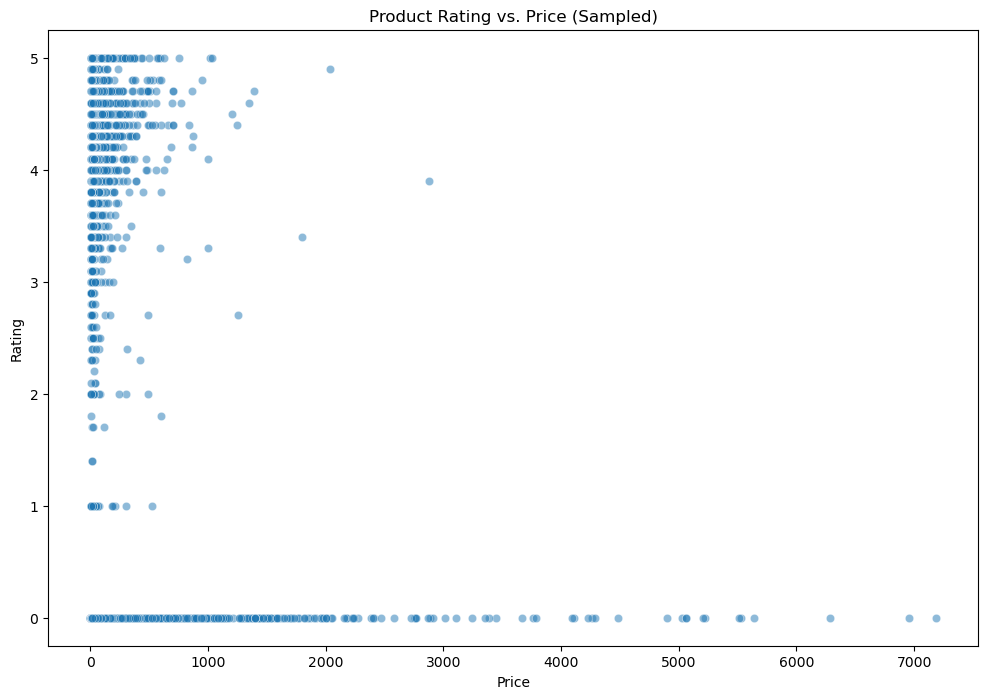

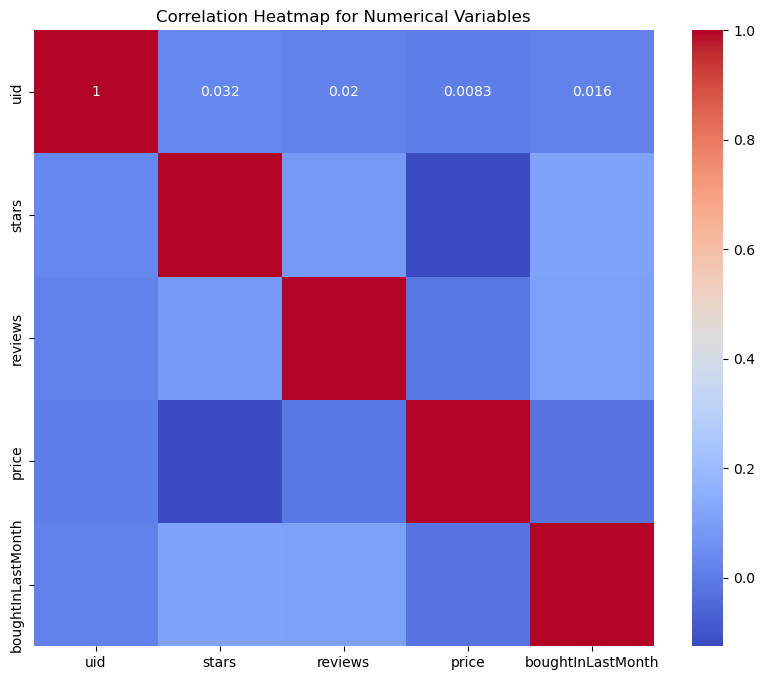

<Figure size 800x600 with 0 Axes>

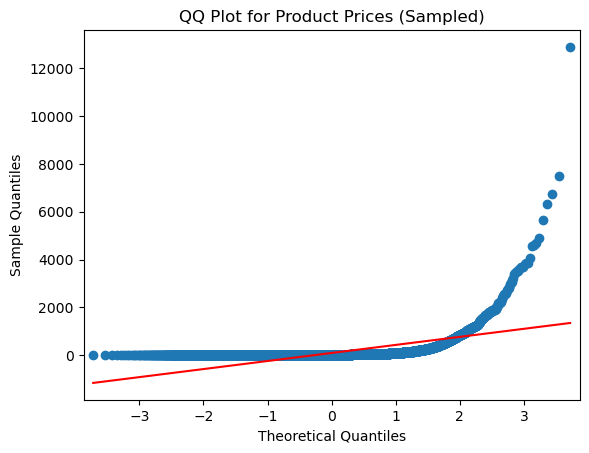

In [8]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pearsonr, stats, boxcox
from scipy.stats.contingency import association
import statsmodels.api as sm



crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_proportion = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
crosstab_proportion_sorted = crosstab_proportion.sort_values(by=True, ascending=False)


chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
cramers_v = association(crosstab_result, method="cramer")


sampled_crosstab = crosstab_result.sample(n=20)
plt.figure(figsize=(12, 8))
sampled_crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Relationship Between Product Categories and Best-Seller Status (Sampled)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


top_20_categories = df_no_outliers['category'].value_counts().head(20).index
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_no_outliers[df_no_outliers['category'].isin(top_20_categories)])
plt.xticks(rotation=90)
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()


median_price_by_category = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
print(f"Category with the highest median price: {median_price_by_category.idxmax()} with median price of {median_price_by_category.max()}")


top_10_categories = df_no_outliers['category'].value_counts().head(10).index
average_price_by_category = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)].groupby('category')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_category.index, y=average_price_by_category.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()


average_price_by_category_all = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)
print(f"Category with the highest average price: {average_price_by_category_all.idxmax()} with average price of {average_price_by_category_all.max()}")


plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df[df['category'].isin(top_10_categories)], palette="viridis")
plt.xticks(rotation=90)
plt.title('Product Ratings Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()


median_rating_by_category = df.groupby('category')['stars'].median().sort_values(ascending=False)
print(f"Category with the highest median rating: {median_rating_by_category.idxmax()} with median rating of {median_rating_by_category.max()}")


correlation_coef, p_value = pearsonr(df['price'], df['stars'])
print(f"Correlation Coefficient between price and rating: {correlation_coef}")
print(f"P-value: {p_value}")


sampled_df = df.sample(n=10000)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='stars', data=sampled_df, alpha=0.5)
plt.title('Product Rating vs. Price (Sampled)')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()


sampled_prices = df['price'].sample(n=10000)
plt.figure(figsize=(8, 6))
sm.qqplot(sampled_prices, line='s')
plt.title('QQ Plot for Product Prices (Sampled)')
plt.show()
